In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
def wrangle(path):
    # Read query resylts into DataFrame
    df = pd.read_csv(path)
    
    # Label ecoding
    # Define the Mapping
    mapping = {
        "Low":0,
        "Moderate":1,
        "High":1
    }
    # Apply the mapping
    df["Heart_Attack_Risk"] = df["Heart_Attack_Risk"].map(mapping)
    
    return df

In [6]:
df = wrangle("resources/heart_attack_risk_dataset.csv")
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,0
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,1
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,0
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,0
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [12]:
df.shape

(50000, 20)

In [28]:
# checking null values from the data
df.isnull().sum()

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64

In [30]:
df.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340,0.499520
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699,0.500005
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000,0.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000,0.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000,0.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000,1.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000,1.000000


In [70]:
numeric_columns = []
for i in df.select_dtypes("number"):
    numeric_columns.append(i)
numeric_columns

['Age',
 'Smoking',
 'Alcohol_Consumption',
 'BMI',
 'Diabetes',
 'Hypertension',
 'Cholesterol_Level',
 'Resting_BP',
 'Heart_Rate',
 'Family_History',
 'Fasting_Blood_Sugar',
 'Exercise_Induced_Angina',
 'Max_Heart_Rate_Achieved',
 'Heart_Attack_Risk']

In [74]:
numeric_columns = df.select_dtypes("number").nunique()

Text(0.5, 1.0, 'Distribution of Values')

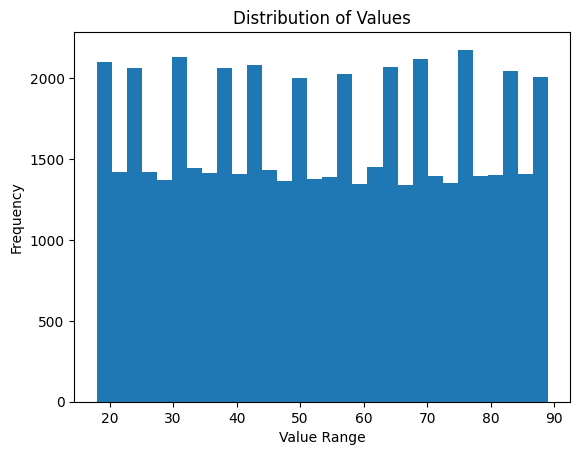

In [108]:
plt.hist(df["Age"],bins=30);
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

Text(0.5, 1.0, 'Distribution of Values')

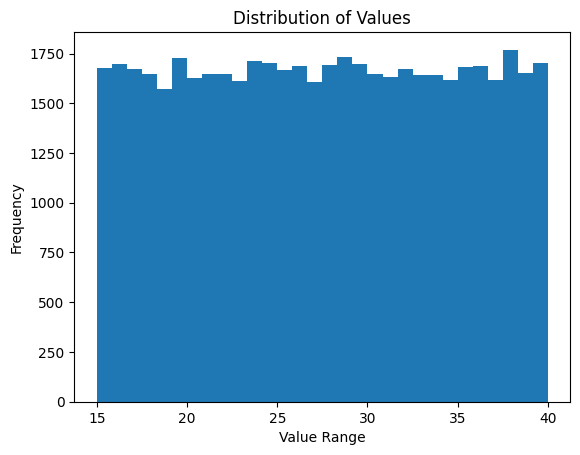

In [110]:
plt.hist(df["BMI"],bins=30);
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

Text(0.5, 1.0, 'Distribution of Values')

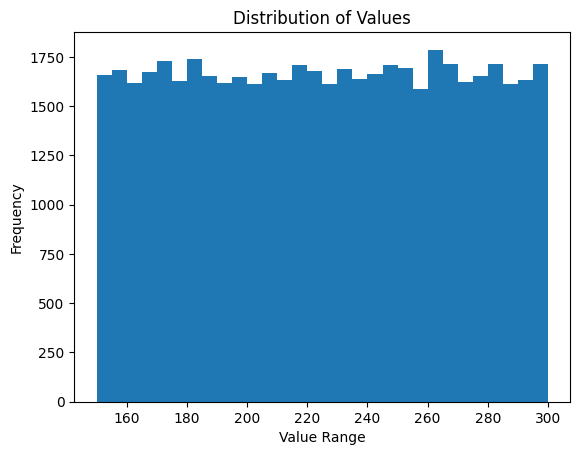

In [112]:
plt.hist(df["Cholesterol_Level"],bins=30);
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

In [ ]:
plt.hist(df["Resting_BP"],bins=30)
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Distribution of Values');

In [ ]:
plt.hist(df["Heart_Rate"],bins=30)
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Distribution of Values');

In [ ]:
plt.hist(df["Max_Heart_Rate_Achieved"],bins=30)
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Distribution of Values');